## Determining the indicators of heavy traffic on I-94.

Interstate 94 (I-94) is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States. The project is about analyzing the traffic conditions and the impact of the different indicators in the dataset; the weather, time of the day, weekdays vs weekends etc. 

Data Set Information:
- Data collected 2019-05-07
- Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.
- Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. 
- Hourly weather features and holidays included for impacts on traffic volume.

Additional column information:

holiday - *Categorical US National holidays plus regional holiday, Minnesota State Fair*       
temp - *Numeric Average temp in kelvin*       
rain_1h - *Numeric Amount in mm of rain that occurred in the hour*       
snow_1h - *Numeric Amount in mm of snow that occurred in the hour*       
clouds_all - *Numeric Percentage of cloud cover*        
weather_main - *Categorical Short textual description of the current weather*       
weather_description - *Categorical Longer textual description of the current weather*       
date_time - *DateTime Hour of the data collected in local CST time*       
traffic_volume - *Numeric Hourly I-94 ATR 301 reported westbound traffic volume*       

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

mitv = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')

In [2]:
print(mitv.head(5))
print(mitv.tail(5))
mitv.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

**Examining the distribution of the traffic_volume column
Looking up a few statistics about the traffic_volume column**


0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
48199    3543
48200    2781
48201    2159
48202    1450
48203     954
Name: traffic_volume, Length: 48204, dtype: int64


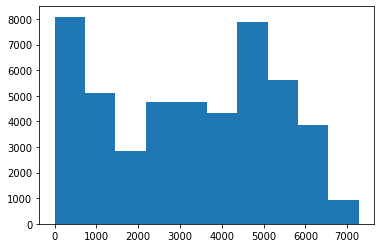

In [3]:
plt.hist(mitv['traffic_volume'])
print(mitv['traffic_volume'])

# Analysing the difference in traffic volume based on time of day

In [4]:
#Transforming the date_time column to datetime 
mitv['date_time'] = pd.to_datetime(mitv['date_time'])

#Getting the hour of every instance of the date_time column
mitv['hour']=mitv['date_time'].dt.hour

#Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
daytime = mitv.copy()[(mitv['hour']<19) & (mitv['hour']>=7)]

#Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)
nighttime = mitv.copy()[(mitv['hour']<7) | (mitv['hour']>=19)]

In [5]:
#looking up a few statistics for traffic_volume for both day and night.
print('Traffic volume during the day time')
print(daytime['traffic_volume'].describe())

print('\nTraffic volume during the night time')
print(nighttime['traffic_volume'].describe()) 

Traffic volume during the day time
count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Traffic volume during the night time
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


**As we can see from the above, traffic is generally lighter during the day, this can be seen by the difference in the mean of traffic volume**

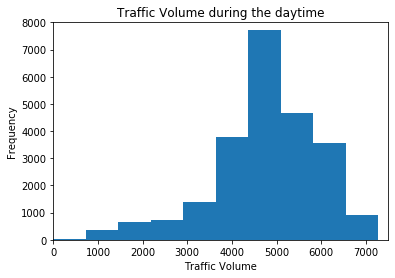

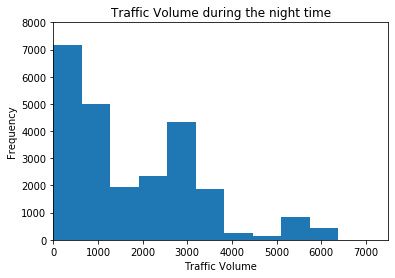

In [6]:
plt.hist(daytime['traffic_volume'])
plt.title('Traffic Volume during the daytime')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.ylim(0,8000) 
plt.xlim(0,7500) 
plt.show()

plt.hist(nighttime['traffic_volume'])
plt.title('Traffic Volume during the night time')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.ylim(0,8000) 
plt.xlim(0,7500) 
plt.show()

The histogram that shows the distribution of traffic volume during the day is left skewed. Whereas the histogram displaying the night-time data is right skewed. This means that most of the traffic volume values during the night are low — on avg during the night the traffic volume is only 2819, whereas during the day the avg traffic volume is 4762. For this reason, moving forward we'll be exclusively analysing the daytime data.

## Analysing the difference in traffic volume based on the month

In [7]:
#create a new column where each value describes the month when the traffic volume measurement was taken.
daytime['Daytime month'] = daytime['date_time'].dt.month

# group the dataset by the month column with the mean as an aggregate function.
daytime_by_month = daytime.groupby('Daytime month').mean()
daytime_by_month['traffic_volume']


Daytime month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

In [8]:
#create a new column where each value describes the month when the traffic volume measurement was taken.
nighttime['Night time month'] = nighttime['date_time'].dt.month

# to group the dataset by the month column with the mean as an aggregate function.
nighttime_by_month = nighttime.groupby('Night time month').mean()
nighttime_by_month['traffic_volume']

Night time month
1     1616.610448
2     1716.961841
3     1817.272029
4     1786.116598
5     1829.852518
6     1932.272727
7     1838.349193
8     1897.564079
9     1818.959858
10    1852.168591
11    1680.311799
12    1622.508393
Name: traffic_volume, dtype: float64

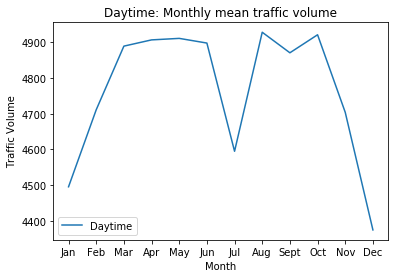

Text(0, 0.5, 'Traffic Volume')

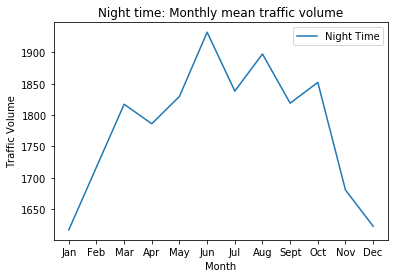

In [9]:
#creating a line graph to visualize how the traffic volume changed each month on average.
daytime_by_month['traffic_volume'].plot.line(label='Daytime')
plt.legend()
month_numbers=[1,2,3,4,5,6,7,8,9,10,11,12]
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=month_numbers,labels=months)
plt.title("Daytime: Monthly mean traffic volume")
plt.xlabel('Month')
plt.ylabel('Traffic Volume')

plt.show()

nighttime_by_month['traffic_volume'].plot.line(label='Night Time')
plt.legend()
month_numbers=[1,2,3,4,5,6,7,8,9,10,11,12]
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=month_numbers,labels=months)
plt.title("Night time: Monthly mean traffic volume")
plt.xlabel('Month')
plt.ylabel('Traffic Volume')

#we can see there was a sharp dip in mean traffic volume in July



**We can see that there was dip in traffic volume  during July in the daytime but not the night.
It appears to be common for construction to take place in July in Minnesota due the weather conditions.**


## Analysing the difference in traffic volume based on the day of the week

In [10]:
#building line plots for another time unit: day of the week.
#traffic volume averages for each day of the week,
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  
# 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

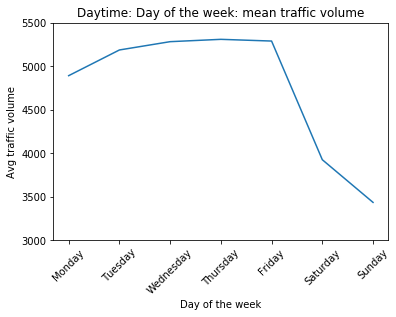

In [11]:
# visualise how the traffic volume changed each day of the week on average.
by_dayofweek['traffic_volume'].plot.line()
plt.ylim(3000,5500) 
plt.title("Daytime: Day of the week: mean traffic volume")
positions = (0,1,2,3,4,5,6,)
days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(positions, days, rotation=45)
plt.xlabel('Day of the week')
plt.ylabel('Avg traffic volume')

plt.show()

We can see avg traffic volume drops from over 5000 on Friday to just under 4000 by the next day, Saturday. 
This clearly indicates that traffic in the city is impacted by the whether it is a week day or weekend. 

# Analysing the difference in traffic volume based on the day type; week day vs weekend

In [12]:
##splitting the data based on the day type: business day or weekend
daytime['hour'] = daytime['date_time'].dt.hour
week_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_week_days = week_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_week_days['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


In [13]:
print(by_hour_week_days['traffic_volume'].describe())
print(by_hour_weekend['traffic_volume'].describe())

count      12.000000
mean     5192.498812
std       615.622781
min      4378.419118
25%      4799.891475
50%      5024.132518
75%      5640.880110
max      6189.473647
Name: traffic_volume, dtype: float64
count      12.000000
mean     3709.128440
std       911.307344
min      1589.365894
25%      3542.880206
50%      4098.037442
75%      4346.478609
max      4372.482883
Name: traffic_volume, dtype: float64


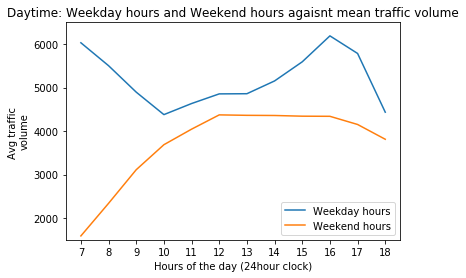

In [14]:
by_hour_week_days['traffic_volume'].plot.line(label='Weekday hours')
by_hour_weekend['traffic_volume'].plot.line(label='Weekend hours')

plt.title("Daytime: Weekday hours and Weekend hours agaisnt mean traffic volume")
plt.xlabel('Hours of the day (24hour clock)')
plt.ylabel('Avg traffic \nvolume', rotation=90)
positions = (7,8,9,10,11,12,13,14,15,16,17,18)
positions_label = (7,8,9,10,11,12,13,14,15,16,17,18)
plt.xticks(positions,positions)
plt.ylim(1500,6500)
plt.legend()
plt.show()



We can see that for weekdays traffic volume on avg peaks at the beginning of the day at 0700 and and again at 1600 hours, which indicates that school pick ups and drop off are responsible for increase in traffic volume.
In comparison, we can see for weekend hours traffic volume slowly increases from 7 and peaks at 12 noon and then remains steady with no other peaks.


## Analysing the relationship between weather and traffic volume

In [15]:
#looking at the two weather columns
print(mitv['weather_main'].value_counts())
print(mitv['weather_description'].value_counts())

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64
sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy

In [16]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
Daytime month    -0.022337
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

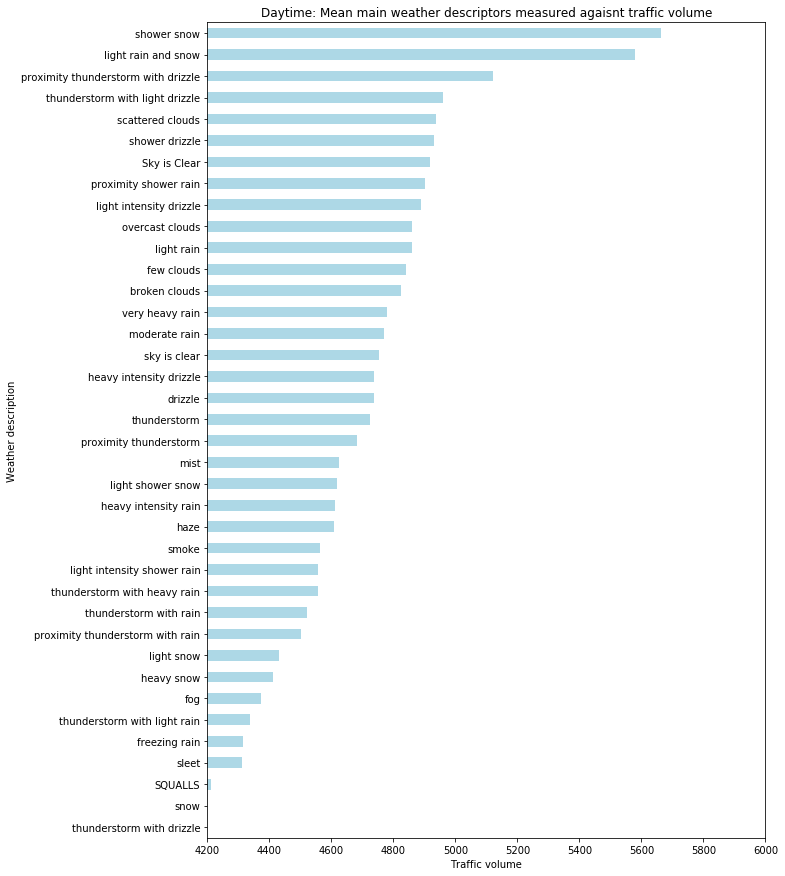

In [28]:
daytime['weather_description'] = daytime['weather_description'].sort_values()

by_weather_description = daytime.groupby('weather_description').mean()
by_weather_description['traffic_volume'].sort_values().plot.barh(color='lightblue',figsize=(10,15))

plt.title('Daytime: Mean main weather descriptors measured agaisnt traffic volume')
plt.xlabel('Traffic volume')
plt.ylabel('Weather description')
plt.xlim(4200,6000)
plt.show()

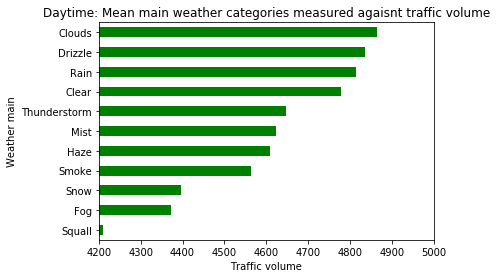

In [23]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_main['traffic_volume'].sort_values().plot.barh(color='green')
plt.xlabel('Traffic volume')
plt.ylabel('Weather main')
plt.title('Daytime: Mean main weather categories measured agaisnt traffic volume')
plt.xlim(4200,5000)
plt.show()

# Conclusion for Day Traffic Indicator¶
I found two main types of indicators of heavy traffic on the I-94 Interstate highway.

Time indicators
- The traffic is usually heavier during the day
- Traffic volume increases sharply in the first few months of the year and then remains consistent from March to July; averaging at 4901 in traffic volume. Then, due to construction, it dips in July and then picks up again and remains steady unti Oct where it begins to drop. 
- The traffic is usually heavier on week days compared to the weekends.
- On week days, the rush hours are around 7am and 4pm, most likely due to school dropoffs and pickups.

Weather Indicators

- Traffic volume increases when it's snowing and raining at the same time as seen on the weather descriptors agaisnt avg traffic volume chart


